In [2]:
import pandas as pd 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as plt

file_path = 'H351_yoyo_01_L4.csv'
df = pd.read_csv(file_path)

file_path2 = 'H351_yoyo_02.csv'
df2 = pd.read_csv(file_path2)

file_path3 = 'H351_yoyo_03.csv'
df3 = pd.read_csv(file_path3)

file_path4 = 'H351_yoyo_04.csv'
df4 = pd.read_csv(file_path4)

print(df.head())
print(df2.head())
print(df3.head())
print(df4.head())

   fieldswavelength         Es        Kl     Kl_SE        Kd     Kd_SE  \
0               354  46.857103  0.041618  0.003707  0.046686  0.005253   
1               356  47.646716  0.039800  0.003653  0.045636  0.005247   
2               358  48.673533  0.037682  0.003566  0.044092  0.005344   
3               360  50.700522  0.036237  0.003575  0.042293  0.005399   
4               362  53.669423  0.035421  0.003673  0.040349  0.005417   

        Lu0        Ed0        Lw      LwSE     LwSE1        Ed1      F0  \
0  0.736190  39.507165  0.398408  0.393291  0.403592  41.205974  104.01   
1  0.749890  40.699964  0.405822  0.400686  0.411024  42.450062  104.23   
2  0.768968  41.872861  0.416147  0.411005  0.421352  43.673394  104.23   
3  0.801210  43.574401  0.433595  0.428224  0.439034  45.448100  103.62   
4  0.845847  45.773927  0.457751  0.451926  0.463652  47.742206  107.42   

        Lwn  
0  0.908664  
1  0.912967  
2  0.916409  
3  0.911336  
4  0.942324  
   fieldswavelength 

In [3]:
def calculate_rrs(data): 
    rrs = data['Lw'] / data['Es']
    return(rrs)

In [4]:
Rrs = calculate_rrs(df)
print(Rrs)

Rrs2 = calculate_rrs(df2)
print(Rrs2)

Rrs3 = calculate_rrs(df3)
print(Rrs3)

Rrs4 = calculate_rrs(df4)
print(Rrs4)

0      0.008503
1      0.008517
2      0.008550
3      0.008552
4      0.008529
         ...   
217    0.000010
218    0.000004
219    0.000010
220    0.000037
221    0.000008
Length: 222, dtype: float64
0      0.009332
1      0.009463
2      0.009590
3      0.009623
4      0.009576
         ...   
217    0.000060
218    0.000014
219    0.000012
220    0.000010
221    0.000008
Length: 222, dtype: float64
0      1.154339e-02
1      1.170349e-02
2      1.182086e-02
3      1.201737e-02
4      1.207048e-02
           ...     
215    2.924199e-06
216   -9.434665e+00
217    2.840363e-06
218    3.084116e-06
219    6.191855e-07
Length: 220, dtype: float64
0      0.009745
1      0.009762
2      0.009782
3      0.009773
4      0.009739
         ...   
217    0.000017
218    0.000001
219    0.000001
220    0.000003
221    0.000002
Length: 222, dtype: float64


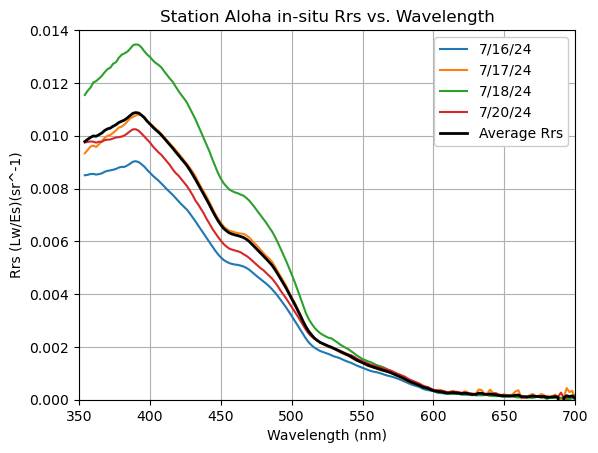

In [17]:
plt.plot(df['fieldswavelength'], Rrs, label='7/16/24')
plt.plot(df2['fieldswavelength'], Rrs2, label='7/17/24')
plt.plot(df3['fieldswavelength'], Rrs3, label='7/18/24')
plt.plot(df4['fieldswavelength'], Rrs4, label='7/20/24')
plt.plot(combined_df['Wavelength'], combined_df['Average_Rrs'], label='Average Rrs', color='black', linewidth=2)
plt.title('Station Aloha in-situ Rrs vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Rrs (Lw/Es)(sr^-1)')
plt.ylim(0, 0.014)
plt.xlim(350, 700)
plt.legend(framealpha=1, frameon=True)
plt.grid(True)
plt.show()

colors = pl.cm.PuBuGn(np.linspace(0,1,27))

cmap = mpl.cm.PuBuGn
bounds = [0, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig, ax = plt.subplots(layout='constrained')
for i in range(0,26):
    plt.plot(region["wavelength"].values,region["Rrs"].values[i], color=colors[i], label='%s day' % i)
    plt.xlim([400,725])
    plt.ylim([-0.001,0.011])


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal',
             label="Day")
#plt.legend()

In [9]:
combined_df = pd.DataFrame({
    'Wavelength': df['fieldswavelength'],
    'Rrs_1': Rrs,
    'Rrs_2': Rrs2,
    'Rrs_3': Rrs3,
    'Rrs_4': Rrs4
})

combined_df['Average_Rrs'] = combined_df[['Rrs_1', 'Rrs_2', 'Rrs_3', 'Rrs_4']].mean(axis=1)

In [10]:
combined_df.to_csv('Rrs_average.csv', index=False) 
combined_df

,Wavelength,Rrs_1,Rrs_2,Rrs_3,Rrs_4,Average_Rrs
0,354,0.008503,0.009332,1.154339e-02,0.009745,0.009781
1,356,0.008517,0.009463,1.170349e-02,0.009762,0.009862
2,358,0.008550,0.009590,1.182086e-02,0.009782,0.009936
3,360,0.008552,0.009623,1.201737e-02,0.009773,0.009991
4,362,0.008529,0.009576,1.207048e-02,0.009739,0.009979
...,...,...,...,...,...,...
217,788,0.000010,0.000060,2.840363e-06,0.000017,0.000023
218,790,0.000004,0.000014,3.084116e-06,0.000001,0.000006
219,792,0.000010,0.000012,6.191855e-07,0.000001,0.000006
220,794,0.000037,0.000010,NaN,0.000003,0.000017
